<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive


In [4]:
from google.colab import drive
drive.mount("/drive")
directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"
directory

Mounted at /drive


'/drive/My Drive/Colab Notebooks/epidemiologia/'

# Dependencias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#interactive table
from vega_datasets import data

#dates
import matplotlib.dates as mdates


# CASOS

Casos diarios y acumulados

In [6]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios.to_csv("/drive/My Drive/Colab Notebooks/epidemiologia/casos_diarios.csv")
casos_diarios

%load_ext google.colab.data_table

In [7]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")


%load_ext google.colab.data_table
casos_acumulados

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,1,0,0,1
2020-03-13,0,0,1,6,0,0,1,0,0,8
2020-03-14,0,0,1,6,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,25193,87683,60959,21600,19188,32575,147965,19306,6491,420960
2021-06-20,25332,87977,61296,21640,19287,32597,148086,19325,6506,422046
2021-06-21,25445,88190,61484,21674,19334,32621,148201,19342,6519,422810
2021-06-22,25598,88314,61874,21742,19408,32769,148859,19377,6536,424477


# Muertes

Muertes diarias y acumuladas

In [8]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias.to_csv(directory + "muertes_diarias.csv")

muertes_diarias

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,15,5,17,5,2,3,27,5,0,79
2021-06-20,4,5,19,2,5,4,4,1,0,44
2021-06-21,8,8,11,0,2,2,7,1,3,42
2021-06-22,6,6,20,5,7,4,15,3,3,69


In [9]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,1111,2250,2378,1081,659,822,5038,821,301,14461
2021-06-20,1115,2255,2397,1083,664,826,5042,822,301,14505
2021-06-21,1123,2263,2408,1083,666,828,5049,823,304,14547
2021-06-22,1129,2269,2428,1088,673,832,5064,826,307,14616


# Pruebas

In [10]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu



,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
Fecha,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,51.0,2294.0,25.0,1159.0,NaN,3444.0,2.0,465.0,20.0,156.0,15.0,50.0,22.0,175.0,123.0,230.0,15.0,76.0
2020-05-08,64.0,2399.0,29.0,1203.0,NaN,3532.0,1.0,472.0,20.0,170.0,10.0,60.0,44.0,176.0,NaN,230.0,13.0,79.0
2020-05-09,67.0,2515.0,29.0,1244.0,NaN,3638.0,15.0,475.0,33.0,186.0,10.0,61.0,NaN,NaN,NaN,239.0,NaN,NaN
2020-05-10,57.0,2578.0,29.0,1252.0,NaN,3889.0,0.0,492.0,4.0,215.0,25.0,61.0,29.0,228.0,182.0,244.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19,743.0,255195.0,400.0,240213.0,NaN,531298.0,NaN,47456.0,55.0,46657.0,NaN,60981.0,NaN,62547.0,55.0,40640.0,15.0,16415.0
2021-06-20,700.0,257367.0,370.0,241115.0,NaN,532092.0,NaN,47637.0,46.0,46830.0,NaN,61039.0,NaN,62793.0,55.0,40685.0,101.0,16496.0
2021-06-21,552.0,258521.0,280.0,241870.0,NaN,532980.0,NaN,47749.0,39.0,46878.0,NaN,61129.0,NaN,63006.0,45.0,40778.0,117.0,16520.0


In [11]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [12]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")


descartados

,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando,Bolivia
Fecha,,,,,,,,,,
2020-05-07,2294.0,1159.0,3444.0,465.0,156.0,50.0,175.0,230.0,76.0,8049.0
2020-05-08,2399.0,1203.0,3532.0,472.0,170.0,60.0,176.0,230.0,79.0,8321.0
2020-05-09,2515.0,1244.0,3638.0,475.0,186.0,61.0,NaN,239.0,NaN,NaN
2020-05-10,2578.0,1252.0,3889.0,492.0,215.0,61.0,228.0,244.0,NaN,NaN
2020-05-11,2657.0,1256.0,4346.0,505.0,NaN,62.0,239.0,253.0,95.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,255195.0,240213.0,531298.0,47456.0,46657.0,60981.0,62547.0,40640.0,16415.0,1301402.0
2021-06-20,257367.0,241115.0,532092.0,47637.0,46830.0,61039.0,62793.0,40685.0,16496.0,1306054.0
2021-06-21,258521.0,241870.0,532980.0,47749.0,46878.0,61129.0,63006.0,40778.0,16520.0,1309431.0


In [13]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-07-01,6724.0,NaN,NaN,9678.0,13066.0,2592.0,1350.0,2722.0,35735.0,2499.0
2020-07-02,6803.0,79565.0,3321.0,9845.0,13420.0,2731.0,1447.0,2757.0,36589.0,2652.0
2020-07-03,6929.0,81784.0,3491.0,10203.0,13951.0,2807.0,1472.0,2805.0,37282.0,2844.0
2020-07-04,6943.0,83956.0,3742.0,10306.0,14478.0,2900.0,1620.0,2858.0,38064.0,3045.0
2020-07-05,6943.0,86876.0,3853.0,10391.0,15326.0,2951.0,1820.0,2874.0,39550.0,3168.0
2020-07-06,7026.0,88816.0,3930.0,10815.0,16079.0,3007.0,1915.0,2932.0,39842.0,3270.0
2020-07-07,7233.0,NaN,4140.0,10931.0,16524.0,3128.0,1946.0,2992.0,NaN,3359.0
2020-07-08,7474.0,92826.0,4261.0,11146.0,17044.0,3261.0,1946.0,3049.0,41049.0,3596.0
2020-07-09,7726.0,94857.0,4526.0,11350.0,17560.0,3351.0,1946.0,3069.0,41534.0,3795.0
2020-07-10,7890.0,97053.0,4530.0,11611.0,18127.0,3495.0,1946.0,3091.0,42298.0,4065.0


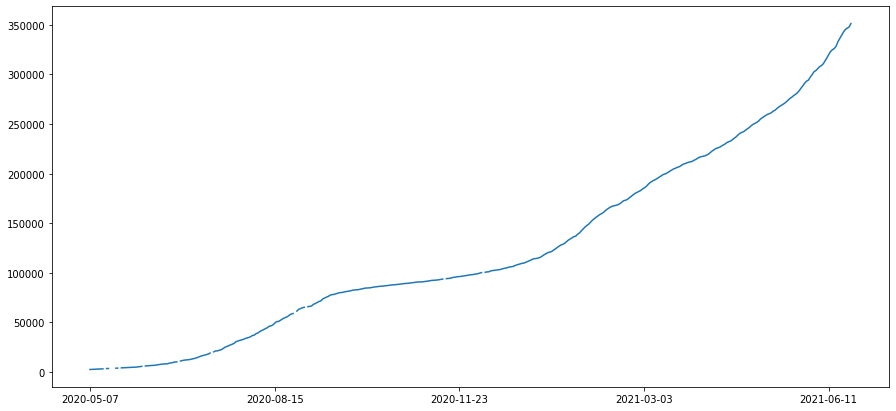

In [14]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0)
pruebas_acum["La Paz"].plot(figsize = (15,7))

pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum[55:75]

In [15]:
pruebas_acum.to_csv("pruebas_acum.csv")

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,81.0,457.0,1.0,52.0,128.0,8.0,3.0,14.0,157.0,13.0
2020-05-09,9.0,NaN,NaN,46.0,123.0,8.0,NaN,16.0,256.0,2.0
2020-05-10,7.0,NaN,NaN,17.0,71.0,20.0,NaN,29.0,347.0,NaN
2020-05-11,84.0,NaN,11.0,9.0,83.0,13.0,NaN,NaN,647.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,118.0,9088.0,934.0,1648.0,3172.0,350.0,25.0,227.0,2383.0,231.0
2021-06-20,64.0,5738.0,385.0,1239.0,2466.0,221.0,96.0,272.0,915.0,80.0
2021-06-21,110.0,4141.0,326.0,943.0,1367.0,146.0,37.0,95.0,1003.0,114.0
2021-06-22,200.0,10827.0,571.0,2817.0,1100.0,261.0,97.0,149.0,4919.0,713.0


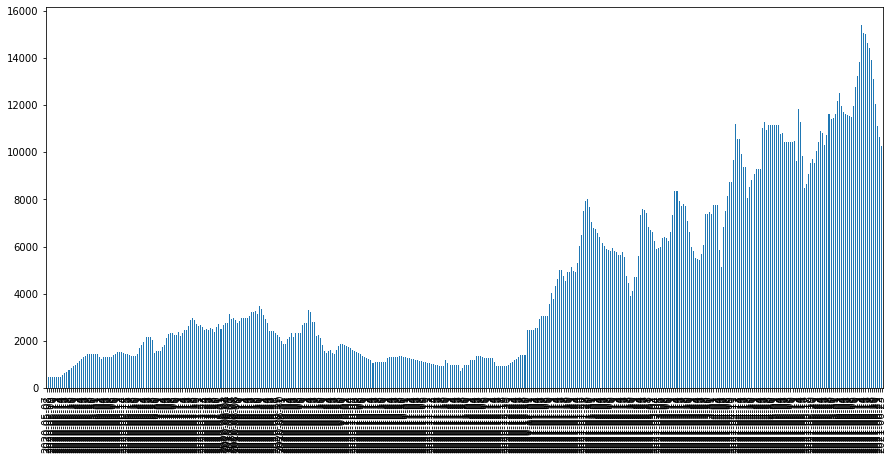

In [16]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias["Bolivia"].rolling(7,min_periods=1).mean().interpolate().plot.bar(figsize = (15,7))
#ax.plot(pruebas_diarias.index, pruebas_diarias)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%M"))
# ax.grid()
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias

# Positividad

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2021-05-03,0.131313,NaN,0.250000,NaN,0.235764,0.254386,0.201835,NaN,0.105243,0.291498
2021-05-04,0.414384,0.153668,0.268657,0.188734,0.109940,0.313589,0.130742,0.616667,0.103585,0.246377
2021-05-05,0.313076,0.162433,0.219207,0.175719,0.123335,0.293217,0.106061,0.368794,0.120588,0.246212
2021-05-06,0.142480,0.185016,0.375000,0.197540,0.131939,0.328321,0.134831,0.287879,0.163055,0.206963
2021-05-07,NaN,NaN,0.348485,0.171953,0.165490,0.332481,0.185185,0.241611,0.183010,0.245580
2021-05-08,NaN,NaN,0.250000,0.231034,0.181179,0.248954,0.123810,0.231760,0.207921,0.197861
2021-05-09,NaN,NaN,0.215164,0.194044,0.260444,0.268657,0.043478,0.311111,0.192173,0.460000
2021-05-10,NaN,NaN,0.339130,0.225790,0.223801,0.302326,0.060317,0.183824,0.160364,0.269777
2021-05-11,0.317757,NaN,0.301047,0.236423,0.160036,0.289703,0.201835,NaN,0.167324,0.333333
2021-05-12,0.266254,NaN,0.360434,0.192049,0.161247,0.358456,0.218182,NaN,0.187528,0.262118


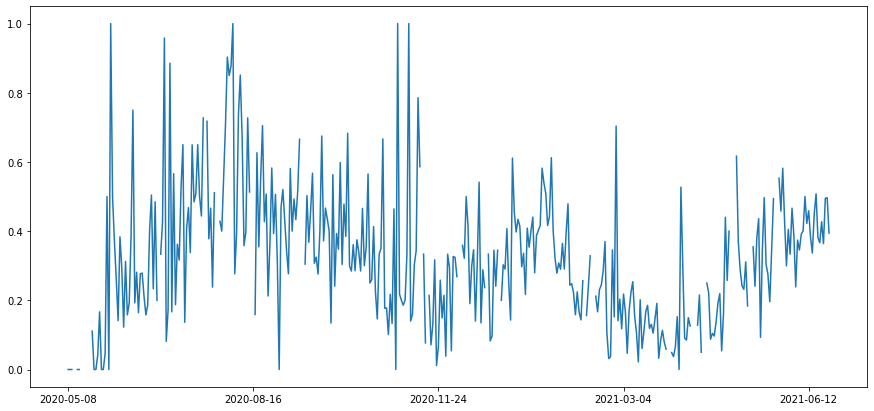

In [17]:
positividad_diaria = casos_diarios / pruebas_diarias
positividad_diaria = positividad_diaria.drop(positividad_diaria.index[0:59])
positividad_diaria["Potosí"].plot(figsize = (15,7))

positividad_diaria.to_csv(directory + "positividad_diaria.csv")

positividad_diaria[360:380]

In [18]:
positividad_diaria_adj = positividad_diaria.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-08,1.000000,0.404814,0.000000,0.153846,0.179688,0.125000,0.000000,0.000000,0.439490,0.230769
2020-05-09,0.500000,0.404814,0.000000,0.131271,0.118299,0.375000,0.000000,0.000000,0.512714,0.365385
2020-05-10,0.428571,0.404814,0.000000,0.263985,0.116425,0.300000,0.000000,0.000000,0.434028,0.365385
2020-05-11,0.544643,0.404814,0.000000,0.336877,0.099367,0.225000,0.000000,0.000000,0.398937,0.243590
2020-05-12,0.435714,0.404814,0.000000,0.305399,0.085319,0.224444,0.000000,0.000000,0.397611,0.216783
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,0.218639,0.178774,0.272156,0.181599,0.191985,0.248431,0.271031,0.407447,0.146742,0.219607
2021-06-20,0.189622,0.180272,0.276637,0.194319,0.165218,0.226094,0.230327,0.404784,0.144670,0.228672
2021-06-21,0.190464,0.178308,0.289315,0.195606,0.148017,0.214607,0.213293,0.427346,0.139651,0.228485
2021-06-22,0.197453,0.174365,0.285697,0.186107,0.143307,0.213108,0.211664,0.434044,0.137923,0.223563


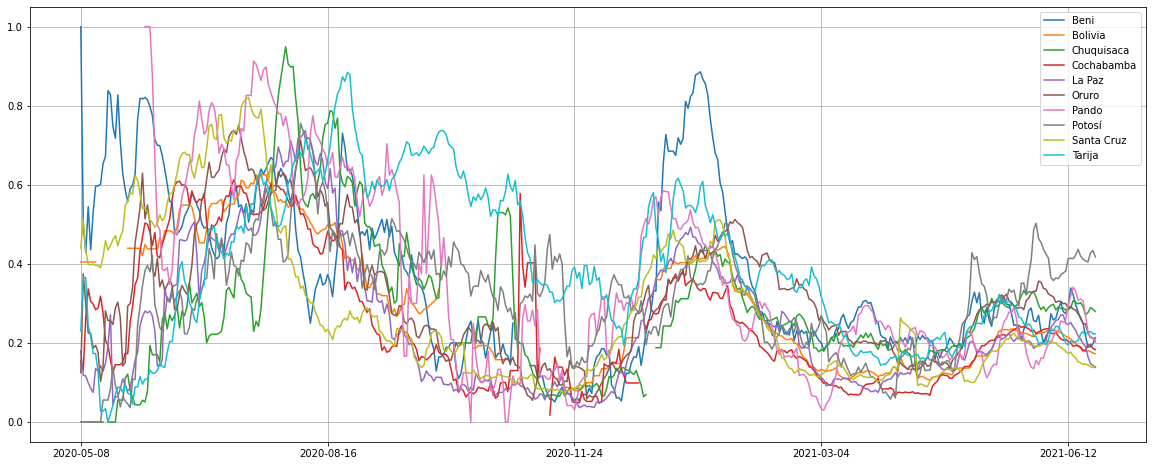

In [19]:
positividad_diaria_adj.plot(figsize = (20,8))
plt.grid()
plt.savefig(directory+"positividad_diaria_todos")

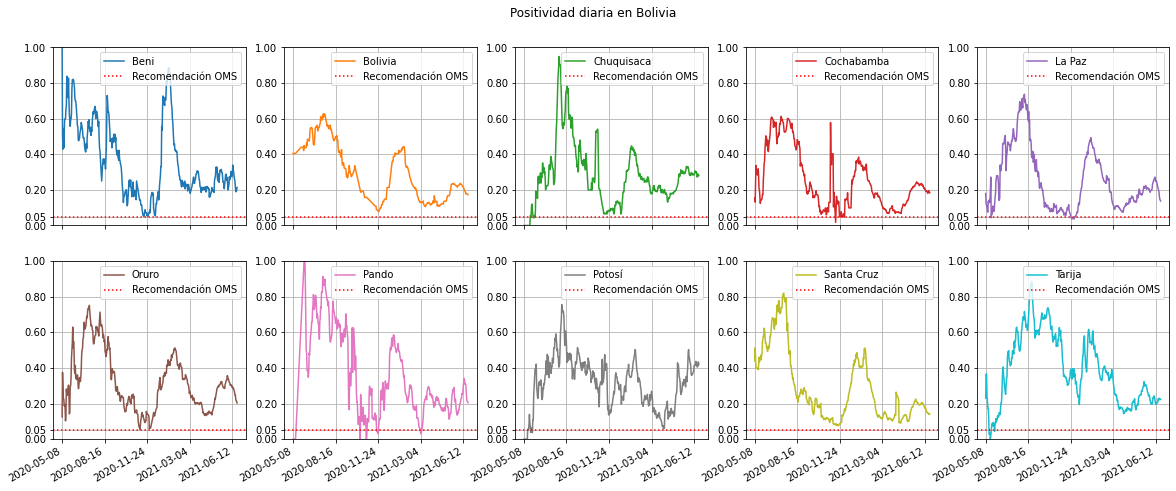

In [40]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia', y=.95)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()

plt.savefig("/drive/My Drive/Colab Notebooks/epidemiologia/positividad.jpg")

In [21]:
plt.savefig("/drive/My Drive/Colab Notebooks/epidemiologia/positividad.jpg")

<Figure size 432x288 with 0 Axes>

hi